In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

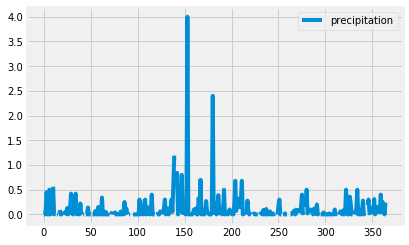

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# class Measurement(Base):
#     __tablename__ = 'measurement'
#     id = Column(Integer,primary_key=True)
#     station = Column(String)
#     date = Column(String)
#     prcp = Column(Float)
#     tobs = Column(Float)

measurements = session.query(Measurement).filter()

# for m in measurements:
#     print("-"*12)
#     print(f"date: {m.date}")
#     print(f"station: {m.station}")
#     print(f"precipitation: {m.prcp}")
date = []
prcp = []
    
# prcpQuery = engine.execute("SELECT date,prcp FROM measurement ORDER BY date DESC LIMIT 365")
prcpQuery = engine.execute("SELECT date,prcp FROM measurement ORDER BY date DESC LIMIT 365")

for p in prcpQuery:
    date.append(p['date'])
    prcp.append(p['prcp'])
    
# Calculate the date 1 year ago from the last data point in the database


# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame({"date":date,"prcp":prcp})

# Sort the dataframe by date
df.set_index('date')

# Un-reverse dataframe
df = df.iloc[::-1]

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(df.index,df['prcp'],label='precipitation')
plt.legend()
# plt.savefig()

In [11]:
df

,date,prcp
364,2017-06-18,0.24
363,2017-06-18,0.00
362,2017-06-18,0.18
361,2017-06-18,0.25
360,2017-06-18,0.05
...,...,...
4,2017-08-22,0.00
3,2017-08-23,0.45
2,2017-08-23,0.08
1,2017-08-23,0.00


![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,329.000000
mean,0.105137
std,0.296032
min,0.000000
25%,0.000000
50%,0.020000
75%,0.100000
max,4.000000


![describe](Images/describe.png)

In [13]:
# Design a query to show how many stations are available in this dataset?
stations = engine.execute("SELECT COUNT(DISTINCT station) FROM measurement")
stations.fetchall()

[(9,)]

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationActivity = engine.execute("SELECT station,COUNT(station) FROM measurement GROUP BY station ORDER BY COUNT(station) DESC")
stationActivity.fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
statTemps = engine.execute("SELECT MIN(tobs),MAX(tobs),AVG(tobs) FROM measurement WHERE station = 'USC00519281'")
statTemps.fetchall()

[(54.0, 85.0, 71.66378066378067)]

(array([ 5.,  7.,  7., 12., 27., 41., 40., 58., 69., 54., 34., 11.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

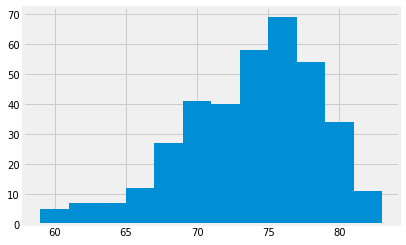

In [42]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sT = engine.execute("SELECT date,tobs FROM measurement WHERE station = 'USC00519281'ORDER BY date DESC LIMIT 365")
# sT.fetchall()  

date = []
tobs = []

for s in sT:
    date.append(s['date'])
    tobs.append(s['tobs'])

stDF = pd.DataFrame({'date':date,'tobs':tobs})
# Un-reverse dataframe
stDF = stDF.iloc[::-1]
stDF.set_index('date')
plt.hist(stDF.tobs,bins=12)

## REVISIT

In [17]:
stDF

,date,tobs
364,2016-08-10,82.0
363,2016-08-11,80.0
362,2016-08-12,76.0
361,2016-08-13,80.0
360,2016-08-14,76.0
...,...,...
4,2017-08-14,77.0
3,2017-08-15,77.0
2,2017-08-16,76.0
1,2017-08-17,76.0


![precipitation](Images/station-histogram.png)

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [52]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calcTemps = (calc_temps('2016-08-10','2017-08-18')[0])
print(calcTemps)

[58.0, 74.68205574912892, 87.0]


In [61]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tMin = calcTemps[0]
tAvg = calcTemps[1]
tMax = calcTemps[2]

# pd.DataFrame({'tmin':tMin,'tavg':tAvg,'tMax':tMax})

# Revisit


In [79]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# REVISIT

totalRain = engine.execute("SELECT DISTINCT station, SUM(prcp) FROM measurement WHERE date > 2015 AND date < 2016 GROUP BY station")
totalRain.fetchall()

[('USC00511918', 6.090000000000001),
 ('USC00513117', 53.49),
 ('USC00514830', 41.54999999999998),
 ('USC00516128', 165.5200000000001),
 ('USC00517948', 3.6200000000000006),
 ('USC00518838', 0.0),
 ('USC00519281', 87.69999999999997),
 ('USC00519397', 18.35999999999998),
 ('USC00519523', 56.92999999999998)]